Tugas Akhir : 

### Analisis Sentimen Mitra untuk Telkom University Pada Media Sosial Twitter Menggunakan Algoritma Decision Tree (CART)

Sean Akbar Ryanto (1301180258)

# Library Package

## Install Library

In [1]:
# Library package untuk preprocessing stopwords removal dan stemming
!pip install PySastrawi
!pip install -U nltk
!pip install googletrans==3.1.0a0
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Library

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
nltk.download('punkt')
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import matplotlib.pyplot as plt
import seaborn as sns 

from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Sentimen

## Read Data

In [3]:
data = pd.read_csv('Dataset Internal Labelled.csv')
data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,1
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",0
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,0
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,1
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",1
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,0
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,0
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",0
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,0


In [4]:
data['Sentiment'].replace(to_replace = -1, value = 'negatif', inplace=True)
data['Sentiment'].replace(to_replace = 0, value = 'netral', inplace=True)
data['Sentiment'].replace(to_replace = 1, value = 'positif', inplace=True)

data

,Username,Text Tweet,Sentiment
0,telucareer,bersama kak Tasha Maric Tan. Pada sharing kal...,positif
1,telucareer,"bekerja diperusahaan tersebut, yaitu kak Okta ...",netral
2,telucareer,CTI Group adalah Perusahaan IT yang mendistrib...,netral
3,telucareer,[Alumni Sharing Chapter Industry &amp; Campus ...,positif
4,telucareer,"CAE di tahun 2021, kamu tetap diperbolehkan me...",positif
...,...,...,...
1847,infounivtelkom,Telkom University Badminton Club dengan Bangga...,netral
1848,infounivtelkom,🛸[MAIN EVENT IFEST 2019]🛸 . Akhirnya yang ditu...,netral
1849,infounivtelkom,"#InfoEvent [MAIN EVENT COMPFEST] Halo, Ignit...",netral
1850,infounivtelkom,#InfoEvent [MANIFESTASI 2019 : R E T R O S P ...,netral


Text(0.5, 0, 'Sentimen')

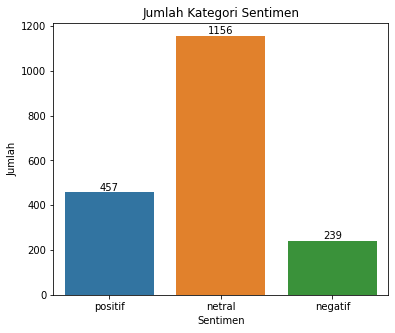

In [5]:
# Menampilkan jumlah kategori sentimen yang dimiliki pada data
f , ax = plt.subplots(figsize = (6,5))
ax = sns.countplot(x='Sentiment', data=data)
ax.bar_label(ax.containers[0])
plt.title('Jumlah Kategori Sentimen', y=1, size=12)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')

In [6]:
data['Sentiment'].value_counts()

netral     1156
positif     457
negatif     239
Name: Sentiment, dtype: int64

In [7]:
# Menyalin data yang dimiliki kedalam variabel lain
sentimen1 = data.copy()

## Translate Data

In [8]:
# from googletrans import Translator

# translator = Translator()

In [9]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(translator.translate, src='en', dest='id')

In [10]:
# sentimen1['Text Tweet'] = sentimen1['Text Tweet'].apply(getattr, args=('text',))

# sentimen1

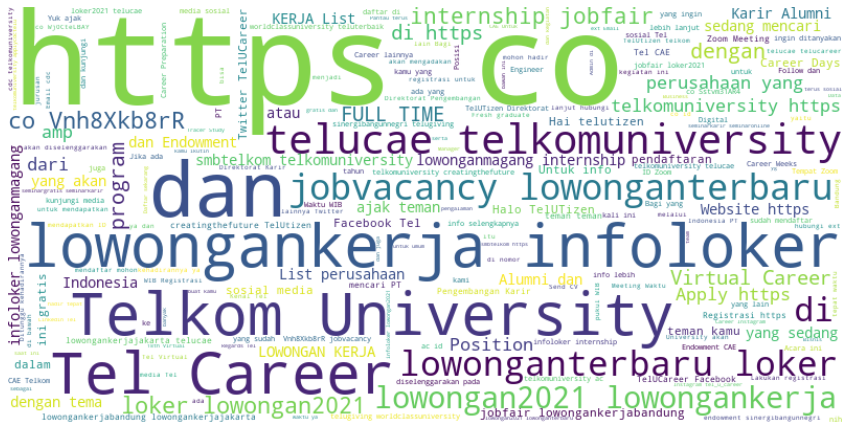

In [11]:
# Start with one review:
all_data = pd.DataFrame(' '.join(sentimen1['Text Tweet'].tolist()), columns=['Text Tweet'], index=[0])
text = all_data['Text Tweet'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Oversampling

In [12]:
x_imb = sentimen1['Text Tweet']
y_imb = sentimen1['Sentiment'] 

In [13]:
x_imb = x_imb.values.reshape(-1, 1)

In [14]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(sampling_strategy='minority')
x_os, y_os = ros.fit_resample(x_imb, y_imb)
x_os, y_os = ros.fit_resample(x_os, y_os)

In [15]:
Counter(y_os)

Counter({'negatif': 1156, 'netral': 1156, 'positif': 1156})

Text(0.5, 0, 'Sentimen')

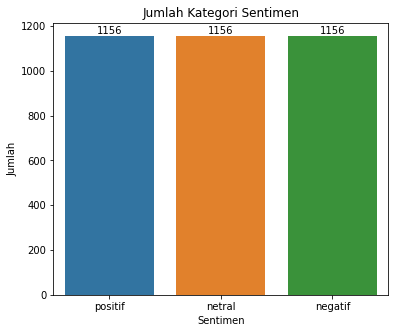

In [16]:
# Menampilkan jumlah kategori sentimen yang dimiliki pada data
f , ax = plt.subplots(figsize = (6,5))
ax = sns.countplot(x=y_os, data=sentimen1)
ax.bar_label(ax.containers[0])
plt.title('Jumlah Kategori Sentimen', y=1, size=12)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')

# Data Splitting

In [17]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 80:20
x1 = x_os.flatten()
y1 = y_os

from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20 , shuffle=True, random_state=123)

In [18]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 75:25
x2 = x_os.flatten()
y2 = y_os

from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25 , shuffle=True, random_state=123)

In [19]:
# Memecah/memisahkan dataset kedalam bentuk data train dan data validasi dengan perbandingan 70:30
x3 = x_os.flatten()
y3 = y_os

from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30 , shuffle=True, random_state=123)

# Feature Extraction TF-IDF (80:20)

## Proses Pembobotan TF-IDF

In [20]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,2))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x1_train_tfidf = vector.transform(x1_train.astype(str))
x1_test_tfidf = vector.transform(x1_test)

## Hasil Pembobotan TF-IDF

In [21]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x1_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
21665,telucae telkomuniversity,0.038489
9671,https co,0.034036
13606,lowongankerjajakarta telucae,0.025939
10686,internship jobfair,0.025547
13598,lowongankerjabandung lowongankerjajakarta,0.024771
...,...,...
2899,be leading,0.000000
16068,openshift administration,0.000000
16064,opening tel,0.000000
16061,open you,0.000000


In [22]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x1_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x1_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x1_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
21665,telucae telkomuniversity,0.036713
9671,https co,0.034041
13606,lowongankerjajakarta telucae,0.029906
13598,lowongankerjabandung lowongankerjajakarta,0.024148
10686,internship jobfair,0.022453
...,...,...
9814,ii menjadi,0.000000
9813,ii cara,0.000000
9812,igracias masing,0.000000
9811,ignitetheera cf11,0.000000


# Feature Extraction TF-IDF (75:25)

## Proses Pembobotan TF-IDF

In [23]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,2))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x2_train_tfidf = vector.transform(x2_train.astype(str))
x2_test_tfidf = vector.transform(x2_test)

## Hasil Pembobotan TF-IDF

In [24]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x2_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
21665,telucae telkomuniversity,0.038449
9671,https co,0.033637
13606,lowongankerjajakarta telucae,0.026095
10686,internship jobfair,0.026020
13598,lowongankerjabandung lowongankerjajakarta,0.024848
...,...,...
5205,co sqgqqjbf1f,0.000000
18411,re play,0.000000
5207,co ss3yxivaxc,0.000000
5210,co submjqizts,0.000000


In [25]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x2_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x2_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x2_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
21665,telucae telkomuniversity,0.037186
9671,https co,0.035239
13606,lowongankerjajakarta telucae,0.028649
13598,lowongankerjabandung lowongankerjajakarta,0.024040
10686,internship jobfair,0.021650
...,...,...
10258,informasi mengenai,0.000000
10259,informasi posisi,0.000000
10260,informasi position,0.000000
10261,informasi pt,0.000000


# Feature Extraction TF-IDF (70:30)

## Proses Pembobotan TF-IDF

In [26]:
# Melakukan pembobotan terhadap data x_train dan y_train yang telah dilakukan splitting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(2,2))
vector = vectorizer.fit(sentimen1['Text Tweet'])
x3_train_tfidf = vector.transform(x3_train.astype(str))
x3_test_tfidf = vector.transform(x3_test)

## Hasil Pembobotan TF-IDF

In [27]:
# Tabel Hasil Pembobotan x_train
weights = np.asarray(x3_train_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_train_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_train_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
21665,telucae telkomuniversity,0.038214
9671,https co,0.033354
13606,lowongankerjajakarta telucae,0.026631
10686,internship jobfair,0.026304
13598,lowongankerjabandung lowongankerjajakarta,0.025296
...,...,...
15200,mohon untuk,0.000000
15201,mojadiapp 1st,0.000000
15202,mojadiapp internship,0.000000
15204,moka posisi,0.000000


In [28]:
# Tabel Hasil Pembobotan x_test
weights = np.asarray(x3_test_tfidf.mean(axis=0)).ravel().tolist()
weights_x3_test_tfidf = pd.DataFrame({"term": vector.get_feature_names(),"weight": weights})
weights_x3_test_tfidf.sort_values(by= "weight", ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
21665,telucae telkomuniversity,0.037947
9671,https co,0.035629
13606,lowongankerjajakarta telucae,0.026970
13598,lowongankerjabandung lowongankerjajakarta,0.023132
10686,internship jobfair,0.021719
...,...,...
10626,intern data,0.000000
10636,intern seller,0.000000
10638,intern senior,0.000000
10642,internasional apply,0.000000


# Klasifikasi

In [29]:
# Library package untuk evaluasi model dengan nilai akurasi
from sklearn.metrics import accuracy_score

# Library package untuk evaluasi keseluruhan performa model
from sklearn.metrics import classification_report

## Hyperparameter Tuning GridSearchCV (80:20)

In [42]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV    # Library package untuk menggunakan validasi GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf1 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf1.fit(x1_train_tfidf, y1_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf1.best_params_)

best parameter :  {'max_depth': 29, 'splitter': 'best'}


In [43]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf1.best_score_)

accuracy :  0.7772407344882216


### Decision Tree 80:20

In [45]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=29)
dt_clf1.fit(x1_train_tfidf, y1_train)

# Memprediksi label sentimen dengan data validasi
dt_predict1 = dt_clf1.predict(x1_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict1, y1_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict1, y1_test, digits=4))

Decision Tree Accuracy Score: 76.513 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.8667    0.9606    0.9112       203
      netral     0.6134    0.7766    0.6854       188
     positif     0.8225    0.6271    0.7116       303

    accuracy                         0.7651       694
   macro avg     0.7675    0.7881    0.7694       694
weighted avg     0.7788    0.7651    0.7629       694



## Confusion Matrix 80:20

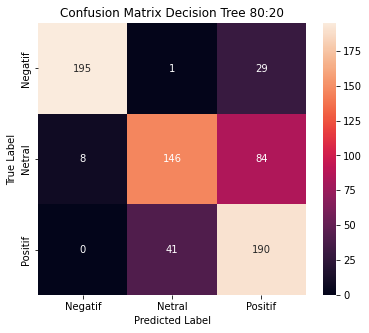

In [46]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y1_test, dt_predict1)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 80:20", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (75:25)

In [47]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf2 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf2.fit(x2_train_tfidf, y2_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf2.best_params_)

best parameter :  {'max_depth': 29, 'splitter': 'best'}


In [48]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf2.best_score_)

accuracy :  0.7816342469790746


### Decision Tree 75:25

In [49]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=29)
dt_clf2.fit(x2_train_tfidf, y2_train)

# Memprediksi label sentimen dengan data validasi
dt_predict2 = dt_clf2.predict(x2_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict2, y2_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict2, y2_test, digits=4))

Decision Tree Accuracy Score: 76.0092 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.8746    0.9569    0.9139       255
      netral     0.6376    0.7480    0.6884       254
     positif     0.7759    0.6285    0.6944       358

    accuracy                         0.7601       867
   macro avg     0.7627    0.7778    0.7656       867
weighted avg     0.7644    0.7601    0.7572       867



## Confusion Matrix Decision Tree 75:25

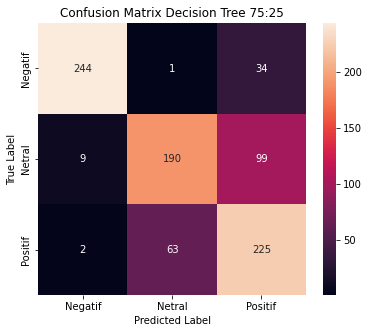

In [50]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y2_test, dt_predict2)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 75:25", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Hyperparameter Tuning GridSearchCV (70:30)

In [51]:
from sklearn.tree import DecisionTreeClassifier     # Library package untuk klasifikasi algoritma Decision Tree
from sklearn.model_selection import GridSearchCV

# Mencari parameter max_depth terbaik antara 1 sampai 30 untuk Decision Tree (CART)
param_grid = {'max_depth' : np.arange(1, 30),
              'splitter' : ['best', 'random']}

# Melatih model untuk mencari parameter max_dept terbaik untuk Decision Tree (CART) berdasarkan nilai akurasi
dt_clf3 = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=10, scoring='accuracy')
dt_clf3.fit(x3_train_tfidf, y3_train)

# Menampilkan parameter max_depth terbaik
print('best parameter : ', dt_clf3.best_params_)

best parameter :  {'max_depth': 29, 'splitter': 'best'}


In [52]:
# Menampilkan akurasi terbaik
print('accuracy : ', dt_clf3.best_score_)

accuracy :  0.7832806176240521


### Decision Tree 70:30

In [55]:
# Melatih model klasifikasi dengan algoritma Decision Tree (CART)
dt_clf3 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=29)
dt_clf3.fit(x3_train_tfidf, y3_train)

# Memprediksi label sentimen dengan data validasi
dt_predict3 = dt_clf3.predict(x3_test_tfidf)

# Menampilkan akurasi dari algoritma Decision Tree (CART) yang didapatkan
print("Decision Tree Accuracy Score:", round(accuracy_score(dt_predict3, y3_test) * 100, 4), '%')

# Menampilkan hasil evaluasi performa secara keseluruhan
print("Classification Report:")
print(classification_report(dt_predict3, y3_test, digits=4))

Decision Tree Accuracy Score: 76.2728 %
Classification Report:
              precision    recall  f1-score   support

     negatif     0.8919    0.9429    0.9167       315
      netral     0.6412    0.7346    0.6848       309
     positif     0.7627    0.6475    0.7004       417

    accuracy                         0.7627      1041
   macro avg     0.7653    0.7750    0.7673      1041
weighted avg     0.7657    0.7627    0.7612      1041



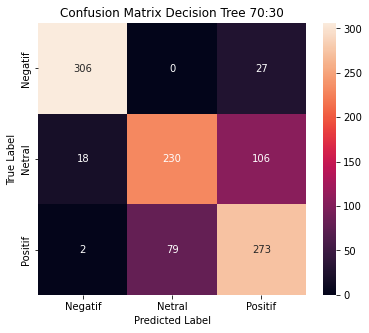

In [41]:
from sklearn.metrics import confusion_matrix

f , ax = plt.subplots(figsize = (6,5))
conf_mat = confusion_matrix(y3_test, dt_predict3)
class_label = ["Negatif", "Netral", "Positif"]
cm = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(cm, annot = True,  fmt=".0f", ax=ax)
plt.title("Confusion Matrix Decision Tree 70:30", y=1, size=12)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()